In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [9]:
df1 = pd.read_csv('Outlet-8.csv') # Reading Data
df2 = pd.read_csv('Outlet-9.csv')
df3 = pd.read_csv('Outlet-10.csv')

df1 = df1.head(12394)
df2 = df2.head(55376)
df3 = df3.head(924)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

In [11]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head()

TransactionDateTime1        0       6       7        8        9        10  \
OutletNumber PumpNumber1                                                    
Outlet-10    1            0.00  122.36  118.93    81.63   375.96   644.81   
Outlet-8     2            0.00    0.00  271.42   944.32  1904.60  2217.52   
             3            0.00    0.03  252.53   399.40   791.69  1420.05   
             5            0.00    0.00   93.36   254.40   404.74   573.89   
Outlet-9     1            8.58  336.49  726.29  1219.06  1568.85  1977.57   

TransactionDateTime1           11       12       13       14       15  \
OutletNumber PumpNumber1                                                
Outlet-10    1             344.03   451.78   320.96   630.12   430.29   
Outlet-8     2            1733.68  1023.33   640.56    91.07    59.93   
             3            1124.50   816.63  1123.54   179.27   114.92   
             5             938.15  1127.65  1099.96   195.53   114.87   
Outlet-9     1            1720.13  1611.67  1355.67  1338.96  1334.38   

TransactionDateTime1           16       17       18       19       20  \
OutletNumber PumpNumber1                                                
Outlet-10    1             214.33   243.08   176.95   287.08   164.58   
Outlet-8     2             353.52   305.30   596.75   557.13   212.55   
             3             604.80   846.58   896.54   929.47   272.80   
             5            1004.06  1344.66  1387.85  1404.39   673.41   
Outlet-9     1            1313.42  1286.01  1690.96  1688.78  1491.13   

TransactionDateTime1           21      22      23  
OutletNumber PumpNumber1                           
Outlet-10    1             115.51  122.32  149.33  
Outlet-8     2               0.00    0.00    0.00  
             3               0.00    0.00    0.00  
             5               0.00    0.00    0.00  
Outlet-9     1            1172.02  978.67  624.22

In [8]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-10,1,644.81,10
1,Outlet-8,2,2217.52,10
2,Outlet-8,3,1420.05,10
3,Outlet-8,5,1404.39,19
4,Outlet-9,1,1977.57,10
5,Outlet-9,4,678.80,13
6,Outlet-9,5,2195.78,10
7,Outlet-9,6,2625.42,10
8,Outlet-9,7,1780.51,18
9,Outlet-9,9,2598.08,10


In [12]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[1 0 2 2 0 1 0 0 2 0 2]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-10,1,644.81,10,1
1,Outlet-8,2,2217.52,10,0
2,Outlet-8,3,1420.05,10,2
3,Outlet-8,5,1404.39,19,2
4,Outlet-9,1,1977.57,10,0
5,Outlet-9,4,678.80,13,1
6,Outlet-9,5,2195.78,10,0
7,Outlet-9,6,2625.42,10,0
8,Outlet-9,7,1780.51,18,2
9,Outlet-9,9,2598.08,10,0


Text(0, 0.5, 'Error')

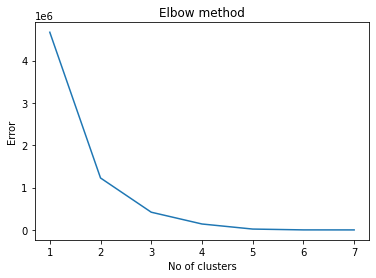

In [13]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

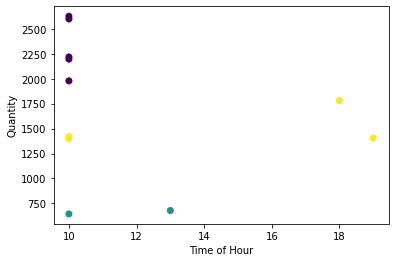

In [14]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [15]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
7,Outlet-9,6,2625.42,10,0
9,Outlet-9,9,2598.08,10,0
1,Outlet-8,2,2217.52,10,0
6,Outlet-9,5,2195.78,10,0
4,Outlet-9,1,1977.57,10,0
8,Outlet-9,7,1780.51,18,2
2,Outlet-8,3,1420.05,10,2
3,Outlet-8,5,1404.39,19,2
10,Outlet-9,10,1398.36,10,2
5,Outlet-9,4,678.80,13,1


In [16]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-9'

In [17]:
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
7,Outlet-9,6,2625.42,10,0
9,Outlet-9,9,2598.08,10,0
1,Outlet-8,2,2217.52,10,0
6,Outlet-9,5,2195.78,10,0
4,Outlet-9,1,1977.57,10,0
8,Outlet-9,7,1780.51,18,2
2,Outlet-8,3,1420.05,10,2
3,Outlet-8,5,1404.39,19,2
10,Outlet-9,10,1398.36,10,2
5,Outlet-9,4,678.80,13,1
